# Time Series Modeling (ARIMA Methods) Assignment

In [1]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Import the Amazon stock price data set (AMZN_data.csv) and plot a line chart with the observed daily closing prices.

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv')

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819,AMZN


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



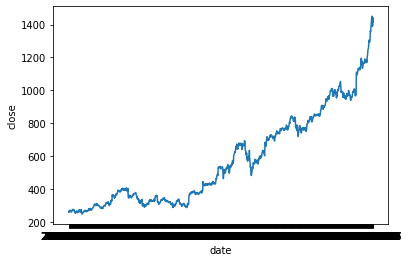

In [5]:
import seaborn as sns
sns.lineplot(df['date'], df['close'])

### Run an Autoregression (AR) model on the series and add the results to a column in the dataframe.

In [7]:
model = AR(df['close']).fit()
df['AR'] = model.predict()

### Plot a multi-line chart comparing the AR model's results with the observed values.

In [8]:
def ilinechart(df, x, y, groups=None, title=''):
  fig = px.line(df, x=x, y=y, color=groups, title=title, 
                template='none').update(layout=dict(title=dict(x=0.5)))

  fig.show()
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'date', 'Value', groups='Variable', title='Observed vs. Modeled')

### Run a Moving Average (MA) model on the series and add the results to a column in the dataframe.

In [9]:
model = ARMA(df['close'], order=(0,1)).fit()
df['MA'] = model.predict()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Thu, 17 Dec 2020   AIC                          16101.538
Time:                        16:16:48   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         576.9791      8.063     71.560      0.000     561.176     592.782
ma.L1.close     0.9834      0.004    226.363      0.000       0.975       0.992
                                    Roots       

### Print the model summary and add the model's results to the line chart with observations and the AR model results.

In [10]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR', 'MA'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'date', 'Value', groups='Variable', title='Observed vs. Modeled')

### Run an Autoregressive Moving Average (ARMA) model on the series and add the results to a column in the dataframe.

Hint: You will need to make the time series stationary in order to run the ARMA model on it. The most common way to do this is by differncing, or subtracting the previous observed value from the current one.

In [13]:
model = ARMA(df['close'], order=(0,1)).fit()
df['ARMA'] = model.predict()
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Thu, 17 Dec 2020   AIC                          16101.538
Time:                        16:20:21   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         576.9791      8.063     71.560      0.000     561.176     592.782
ma.L1.close     0.9834      0.004    226.363      0.000       0.975       0.992
                                    Roots       

### Print the model summary and generate a multi-line chart that compares the ARMA model's results with those from the AR and MA models.

Hint: You will need to de-difference the model results by adding the previous observed values to them.

In [14]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR', 'MA', 'ARMA'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'date', 'Value', groups='Variable', title='Observed vs. Modeled')

### Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

In [18]:
model = ARIMA(df['close'], order=(0,1,1)).fit()
df['ARIMA'] = model.predict(typ='levels')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1258
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4734.799
Method:                       css-mle   S.D. of innovations             10.431
Date:                Thu, 17 Dec 2020   AIC                           9475.598
Time:                        16:21:17   BIC                           9491.010
Sample:                             1   HQIC                          9481.390
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9182      0.292      3.147      0.002       0.346       1.490
ma.L1.D.close    -0.0081      0.027     -0.294      0.769      -0.062       0.046
                                    Root

### Print the model summary and generate a multi-line chart that compares the ARIMA model's results to the observed values.

In [19]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR', 'MA', 'ARMA', 'ARIMA'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'date', 'Value', groups='Variable', title='Observed vs. Modeled')

### Run an Seasonal Autoregressive Integrated Moving Average (SARIMA) model on the series and add the results to a column in the dataframe.

In [20]:
model = SARIMAX(df['close'], order=(1, 1, 1), seasonal_order=(1,1,1,1)).fit()
df['SARIMA'] = model.predict()
print(model.summary())

                                 Statespace Model Results                                
Dep. Variable:                             close   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 1)   Log Likelihood               -4755.986
Date:                           Thu, 17 Dec 2020   AIC                           9521.972
Time:                                   16:22:25   BIC                           9547.654
Sample:                                        0   HQIC                          9531.624
                                          - 1259                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3860      0.013     29.896      0.000       0.361       0.411
ma.L1         -0.8560      0.008   -104.273

### Print the model summary and generate a multi-line chart that compares the SARMA model's results with the observed values.

In [21]:
melted = pd.melt(df[2:], id_vars='date', value_vars=['close','ARIMA', 'SARIMA'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'date', 'Value', groups='Variable', title='Observed vs. Modeled')

### Run an Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model on the series and add the results to a column in the dataframe.

Use the daily Open prices as the exogenous factors.

In [23]:
model = SARIMAX(df['close'], exog=df['open'], order=(1, 1, 1), seasonal_order=(0,0,0,0)).fit()
df['SARIMAX'] = model.predict()
print(model.summary())

                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4452.470
Date:                Thu, 17 Dec 2020   AIC                           8912.941
Time:                        16:24:25   BIC                           8933.490
Sample:                             0   HQIC                          8920.663
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
open           0.9996      0.001   1608.206      0.000       0.998       1.001
ar.L1          0.0074      0.015      0.501      0.616      -0.021       0.036
ma.L1         -1.0000      0.290     -3.454      0.0

### Print the model summary and generate a multi-line chart that compares the SARMAX model's results with the SARIMA model's values.

In [25]:
melted = pd.melt(df[2:], id_vars='date', value_vars=['close','ARIMA', 'SARIMA', 'SARIMAX'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'date', 'Value', groups='Variable', title='Observed vs. Modeled')

### Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.

In [28]:
import numpy as np
models = ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'SARIMAX']

for model in models:
    diff = df['close'] - df[model]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff**2))
    print(f'Model {model} - MAE: {mae} | RMSE: {rmse}')
#SARIMAX performs the best out of the 6 possible methods. It has the lowest errors in both MAE and RMSE

Model AR - MAE: 6.636754781948539 | RMSE: 10.39904085160622
Model MA - MAE: 124.57766603584766 | RMSE: 144.6307251244663
Model ARMA - MAE: 124.57766603584766 | RMSE: 144.6307251244663
Model ARIMA - MAE: 6.58412908722416 | RMSE: 10.434248186807165
Model SARIMA - MAE: 7.029688424441406 | RMSE: 13.49079714538406
Model SARIMAX - MAE: 5.553634628732583 | RMSE: 8.317116767934609
